In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import file of monthly sunspots with ; as delimiter
path = "sunspot_monthly.csv"
sun_m_data = pd.read_csv(path, sep = ";")
sun_m_data.head()

,Year,Month,Date (fraction of year),Monthly Mean Total,Monthly Mean SD,Number of Observations,Definitive/Provisional
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1


In [4]:
#remove all years before temp data, reset index num
sun_m_1895 = sun_m_data[sun_m_data["Year"] >= 1895]
sun_m_1895 = sun_m_1895.reset_index(drop=True)
sun_m_1895.head()

,Year,Month,Date (fraction of year),Monthly Mean Total,Monthly Mean SD,Number of Observations,Definitive/Provisional
0,1895,1,1895.042,105.4,9.2,31,1
1,1895,2,1895.123,112.0,9.4,28,1
2,1895,3,1895.204,101.6,9.0,31,1
3,1895,4,1895.288,128.2,10.1,30,1
4,1895,5,1895.371,112.5,9.4,31,1


In [5]:
#import yearly data, drop all before temp data
path_y = "sunspot_yearly.csv"
sun_y_data = pd.read_csv(path_y, sep = ";")

sun_y_1895 = sun_y_data[sun_y_data['Year'] >= 1895]
sun_y_1895 = sun_y_1895.reset_index(drop=True)
sun_y_1895.head()

,Year,Yearly Mean Total Sunspots,Yearly Mean SD,Number of Observations,Definitive/Provisional
0,1895.5,106.6,9.2,365,1
1,1896.5,69.4,7.4,366,1
2,1897.5,43.8,5.9,365,1
3,1898.5,44.4,6.0,365,1
4,1899.5,20.2,4.1,365,1


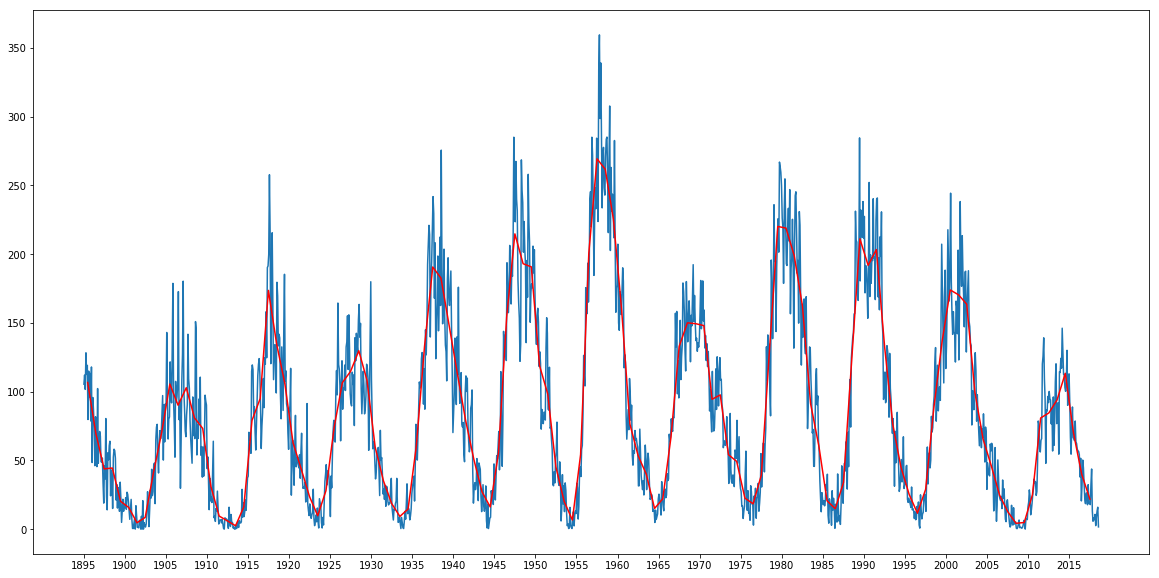

In [6]:
#plot monthy and tear data
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(sun_m_1895["Date (fraction of year)"], sun_m_1895['Monthly Mean Total'])
plt.plot(sun_y_1895["Year"], sun_y_1895["Yearly Mean Total Sunspots"], color = "red")

plt.xticks(np.arange(1895,2020,step = 5))
plt.savefig("year_plot.png")

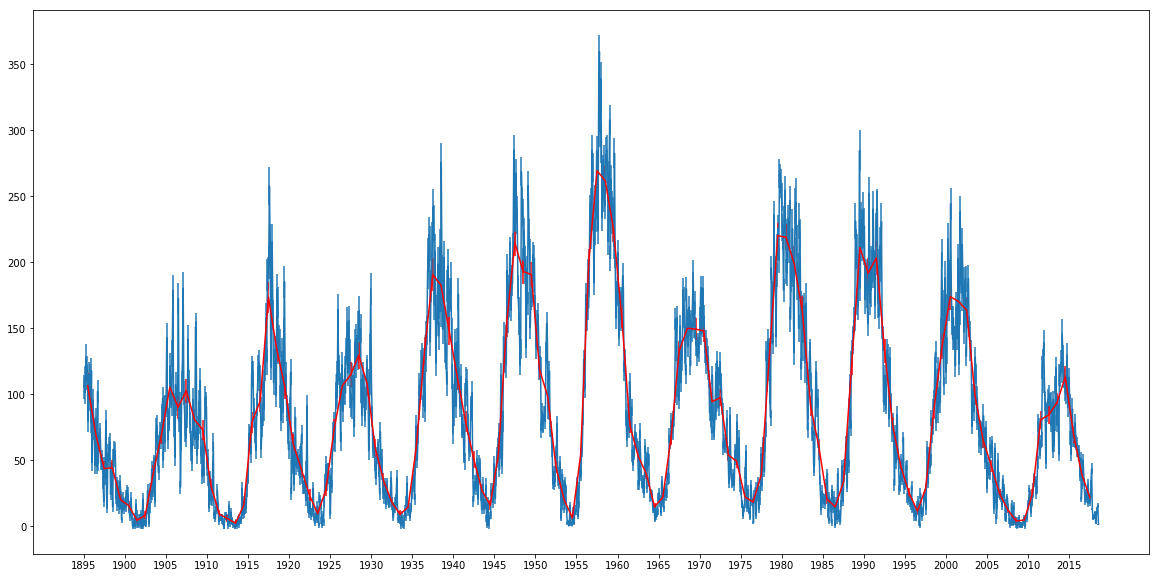

In [7]:
#plot monthly and yearly errorbar
plt.rcParams["figure.figsize"] = (20,10)
plt.errorbar(sun_m_1895["Date (fraction of year)"], sun_m_1895['Monthly Mean Total'], yerr = sun_m_1895["Monthly Mean SD"])
plt.errorbar(sun_y_1895["Year"], sun_y_1895["Yearly Mean Total Sunspots"], color = "red", yerr = sun_y_1895["Yearly Mean SD"])
plt.xticks(np.arange(1895,2020,step = 5))
plt.savefig("year_error")

In [15]:
#import temp data
#path_temp = "ftp://ftp.ncdc.noaa.gov/pub/data/cirs/climdiv/climdiv-tmpcst-v1.0.0-20180705"
path_temp = "temp_data3.txt"
temp_data = pd.read_table(path_temp, sep = "  ", engine = 'python')
temp_data.head()
#alaska data starts at 1925

,Code,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,10021895,43.1,37.4,54.5,63.4,69.5,77.5,79.2,79.5,77.8,59.7,53.2,44.9
1,10021896,43.5,47.7,52.5,68.0,75.9,77.4,81.2,82.2,75.9,63.2,57.3,46.4
2,10021897,41.8,51.1,60.2,62.4,69.0,81.2,81.5,78.8,75.6,67.1,54.2,47.4
3,10021898,49.0,46.1,59.2,58.8,74.1,80.4,80.0,78.8,75.2,61.0,49.8,43.4
4,10021899,43.8,40.0,55.6,61.7,76.1,79.9,80.4,80.9,72.8,66.0,55.3,44.7


In [35]:
#drop all data from 2018 as it is incomplete. incomplete data given -99.90 value
temp_data2 = temp_data[temp_data.Dec != -99.90]

In [40]:
#get only national data
lower_48 = temp_data2[(temp_data2['Code'] < 1110000000) & (temp_data2['Code'] > 1100000000)]
#set year as index
lower_48.loc[:, 'Code'] = lower_48.loc[:,'Code'] - 1100020000
#lower_48['Code'] = lower_48['Code']-1100020000
lower_48 = lower_48.rename(index = str, columns = {'Code':'Year'})
lower_48 = lower_48.set_index('Year')
lower_48.head()

C:\Users\AJGra\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
Year,,,,,,,,,,,,
1895,26.69,26.60,39.97,52.90,59.94,67.80,71.24,71.62,65.57,50.85,39.16,31.71
1896,31.48,35.04,38.03,52.34,62.46,69.89,73.69,72.27,62.94,51.91,38.32,35.55
1897,28.17,33.39,38.79,51.15,61.18,68.11,73.36,71.35,66.40,55.11,40.91,30.76
1898,30.67,35.37,41.05,50.79,59.94,69.31,73.29,72.75,65.46,51.49,38.39,28.67
1899,29.68,25.50,37.63,50.61,59.90,68.65,73.08,71.74,64.80,53.98,44.92,31.62


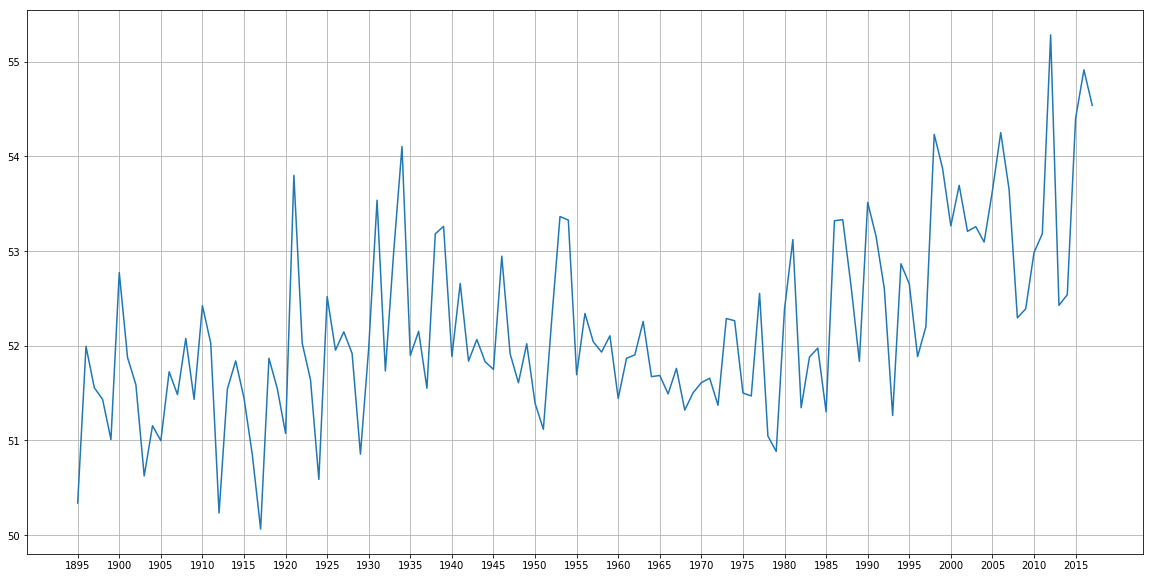

In [48]:
#plt.rcParams["figure.figsize"] = (20,10)
avg_48 = lower_48.mean(axis = 1)
plt.plot(avg_48)

plt.xticks(np.arange(1895,2020,step = 5))
plt.grid()

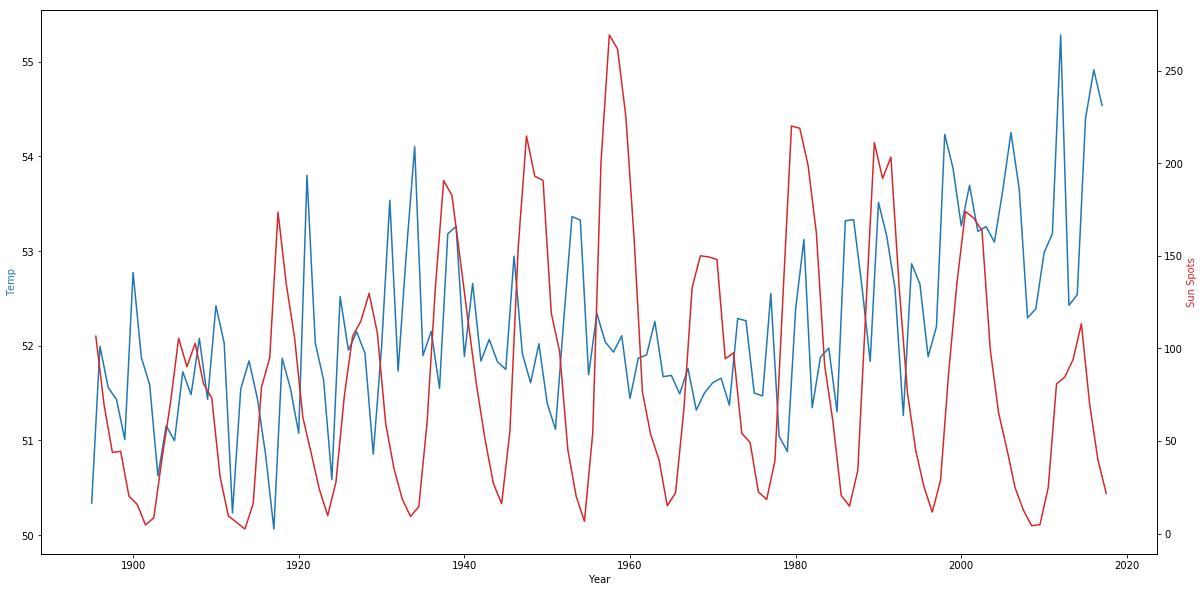

In [50]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Temp', color = color)
ax1.plot(avg_48, color = color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Sun Spots', color = color)
ax2.plot(sun_y_1895["Year"], sun_y_1895["Yearly Mean Total Sunspots"], color = color)


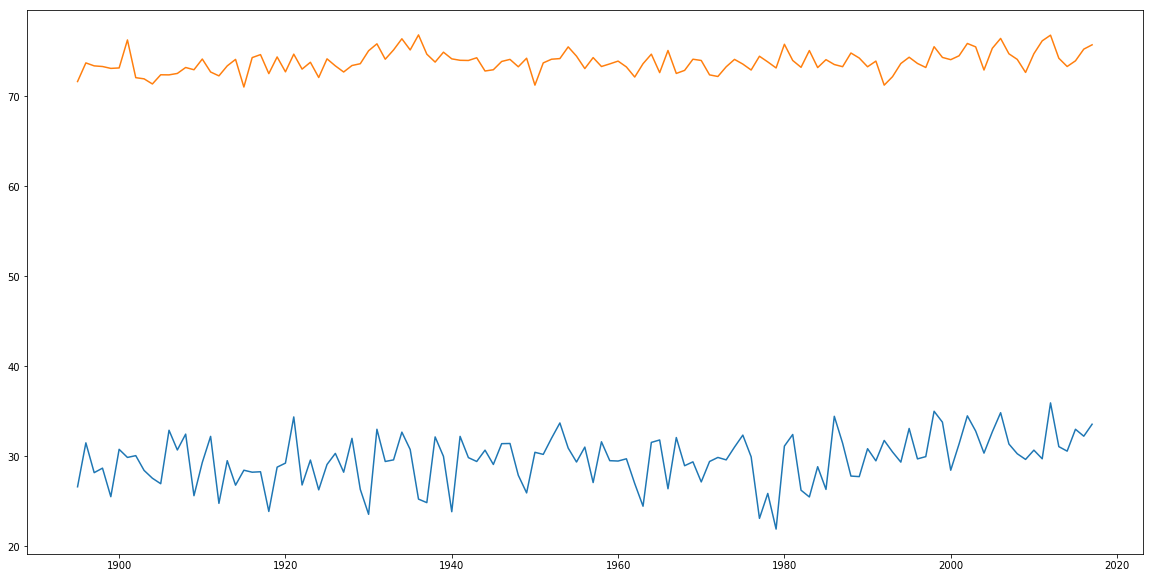

In [54]:
#min and max temp each year
min_48 = lower_48.min(axis = 1)
max_48 = lower_48.max(axis = 1)
plt.plot(min_48)
plt.plot(max_48)